# Chapter 3: The Pandas essentials for data visualization

In [1]:
import pandas as pd

## Get the data

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


In [5]:
mortality_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1900 to 2018
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   01-04 Years  119 non-null    float64
 1   05-09 Years  119 non-null    float64
 2   10-14 Years  119 non-null    float64
 3   15-19 Years  119 non-null    float64
dtypes: float64(4)
memory usage: 4.6 KB


## Long vs. wide data

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

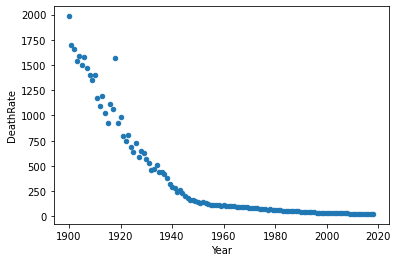

In [4]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

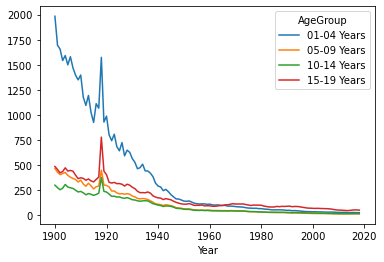

In [6]:
mortality_wide.plot()

## Plot the data

<AxesSubplot:>

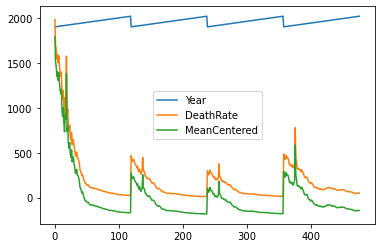

In [7]:
mortality_data.plot()

<AxesSubplot:xlabel='Year'>

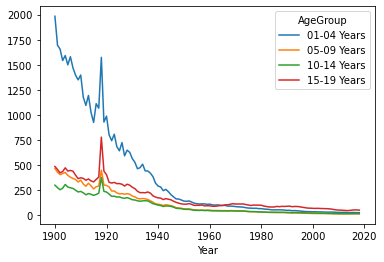

In [8]:
mortality_wide.plot()

## Parameters

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

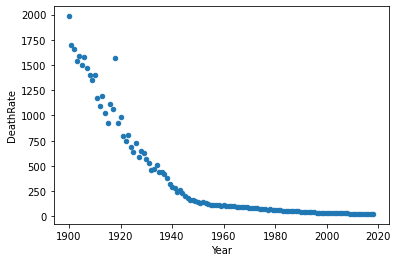

In [9]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

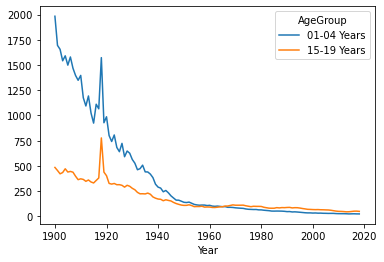

In [10]:
mortality_wide.plot.line(y=['01-04 Years','15-19 Years'])

## Line and area plots

<AxesSubplot:xlabel='Year'>

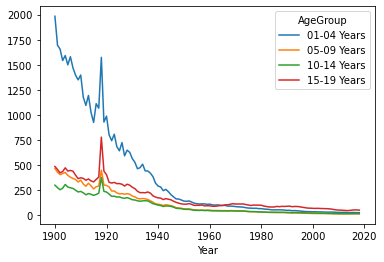

In [11]:
mortality_wide.plot.line()

<AxesSubplot:xlabel='Year'>

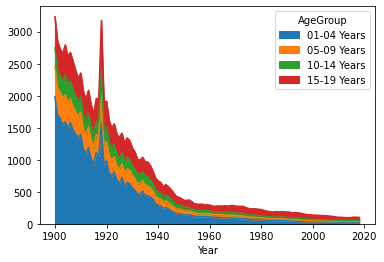

In [12]:
mortality_wide.plot.area()

## Scatter plots

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

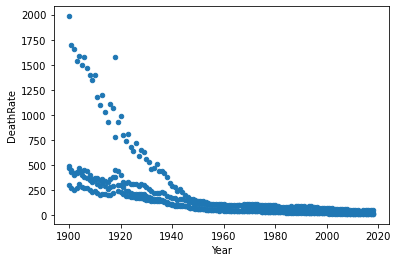

In [15]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

In [14]:
#mortality_data.plot.scatter()   # Error: must have x and y parameters

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

KeyError: 'Year'

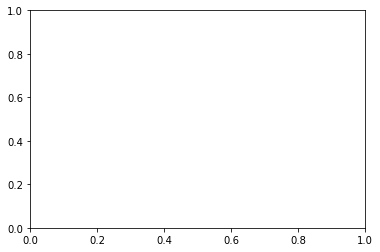

In [16]:
mortality_wide.plot.scatter(x='Year',y='Death_Rate') # Error: 'Year' is in an index

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

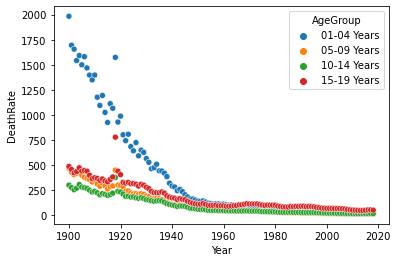

In [18]:
sns.scatterplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

## Bar plots

<AxesSubplot:xlabel='Year'>

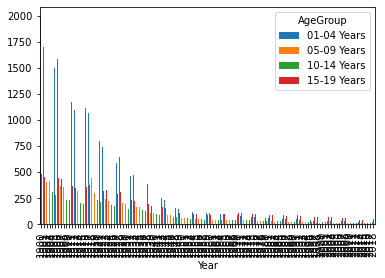

In [20]:
mortality_wide.plot.bar()

<AxesSubplot:xlabel='Year'>

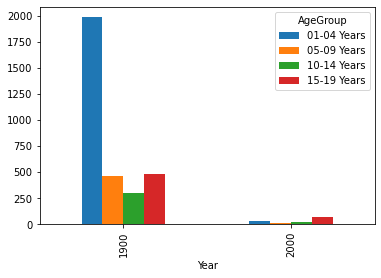

In [19]:
mortality_wide.query('Year in (1900,2000)').plot.bar()

<AxesSubplot:ylabel='Year'>

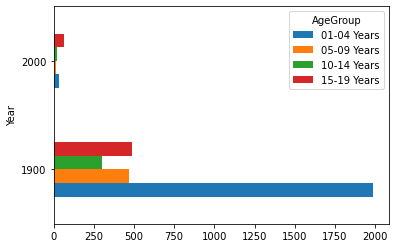

In [21]:
mortality_wide.query('Year in (1900,2000)').plot.barh()

## Histogram and density plots

<AxesSubplot:ylabel='Frequency'>

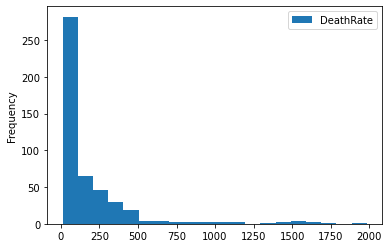

In [28]:
mortality_data.plot.hist(y='DeathRate',bins=20)

In [30]:
mortality_data.DeathRate.describe()

count     476.000000
mean      192.924160
std       293.224216
min        11.400000
25%        40.575000
50%        89.500000
75%       222.575000
max      1983.800000
Name: DeathRate, dtype: float64

<AxesSubplot:ylabel='Density'>

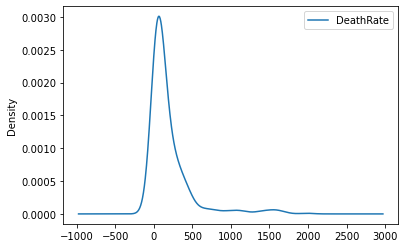

In [29]:
mortality_data.plot.density(y='DeathRate')

<AxesSubplot:ylabel='Density'>

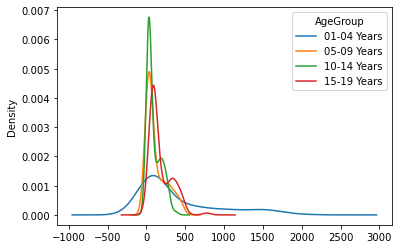

In [31]:
mortality_wide.plot.density()   

<AxesSubplot:ylabel='Frequency'>

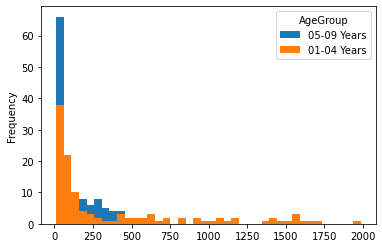

In [34]:
mortality_wide[["05-09 Years","01-04 Years"]].plot.hist(bins=40)   

## Box and pie plots

<AxesSubplot:>

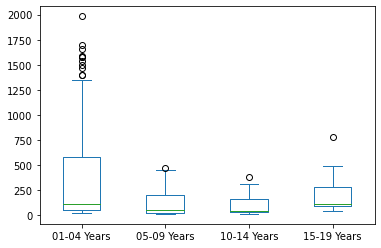

In [35]:
mortality_wide.plot.box()

In [36]:
mortality_wide.describe()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.00000
mean,383.226050,117.326050,93.769748,177.37479
std,500.454211,127.474958,88.404363,138.36229
min,24.000000,11.400000,13.900000,44.80000
25%,50.650000,24.000000,27.200000,85.45000
50%,109.100000,48.400000,44.600000,106.90000
75%,577.300000,198.900000,158.900000,283.65000
max,1983.800000,466.100000,375.100000,777.40000


<AxesSubplot:ylabel='DeathRate'>

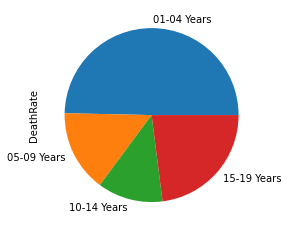

In [37]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

## Improve the appearance

<AxesSubplot:title={'center':'Child Mortality: 1900-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

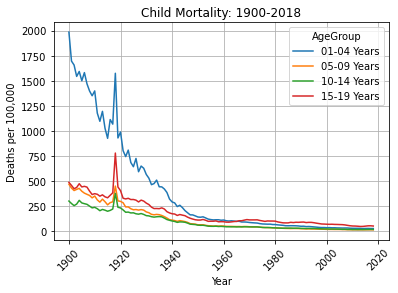

In [38]:
mortality_wide.plot.line(title='Child Mortality: 1900-2018',
                         ylabel='Deaths per 100,000', grid=True, rot=45)

<AxesSubplot:title={'center':'Child Mortality: 2000-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

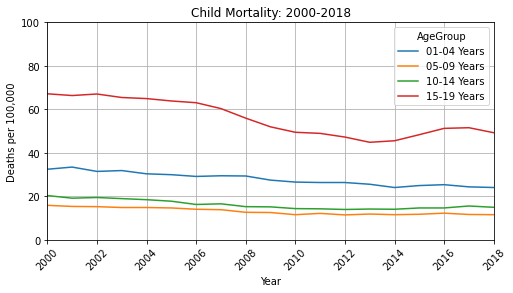

In [43]:
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     ylabel='Deaths per 100,000', figsize=(8,4), grid=True, rot=45,
     xlim=(2000,2018), ylim=(0,100))

## Subplots

array([[<AxesSubplot:title={'center':'Child Mortality: 01-04'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <AxesSubplot:title={'center':'Child Mortality: 05-09'}, xlabel='Year', ylabel='Deaths per 100,000'>],
       [<AxesSubplot:title={'center':'Child Mortality: 10-14'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <AxesSubplot:title={'center':'Child Mortality: 15-19'}, xlabel='Year', ylabel='Deaths per 100,000'>]],
      dtype=object)

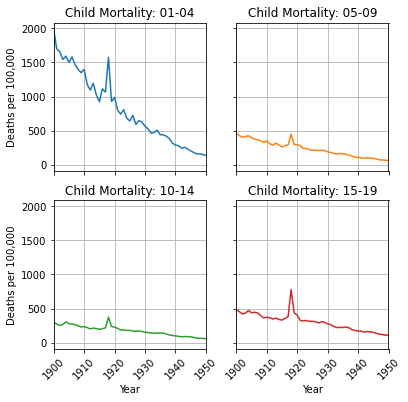

In [45]:
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    ylabel='Deaths per 100,000', sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=False,
    subplots=True, layout=(2,2), figsize=(6,6))

## Chaining

<AxesSubplot:ylabel='AgeGroup'>

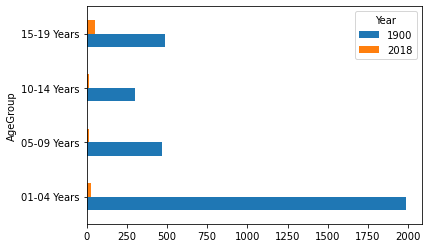

In [46]:
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

<AxesSubplot:xlabel='Year', ylabel='Deaths per 100,000'>

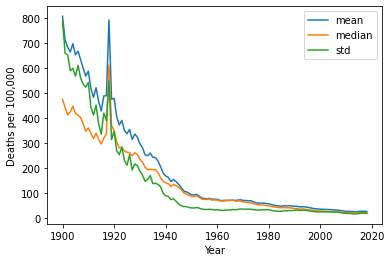

In [47]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']).plot(ylabel='Deaths per 100,000')